In [2]:
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
import sys

In [3]:
def kMeans(data, k=2):
  st = True
  iter = 0
  centroids = np.zeros((k, np.size(data,1)))
  numOfSamples = len(data)
  newData = np.zeros((numOfSamples, np.size(data,1)+1))
  randomIndex = np.random.randint(numOfSamples, size=k)
  centroids = data[randomIndex,:]
  newData[:,:-1] = data

  while st:
    iter += 1
    for i in range(numOfSamples):
      EuclideanDis = np.zeros(k)
      for j in range(len(centroids)):
        EuclideanDis[j] = np.linalg.norm(newData[i,:-1]-centroids[j,:])
      cluster = np.argmin(EuclideanDis) + 1
      newData[i,-1] = cluster
      centroids[cluster-1] = np.mean(newData[newData[:,-1] == cluster, :-1], axis=0)
    
    if(iter == 50):
      st = False

  return newData

In [4]:
def hierarchicalClustering(data, linkage, numOfClusters):
    eucDistances = euclidean_distances(data, data)
    np.fill_diagonal(eucDistances,sys.maxsize)
    clusters = findClusters(eucDistances, linkage) 
    clusterIndice = eucDistances.shape[0] - numOfClusters
    dataClusters = clusters[clusterIndice]
    
    return dataClusters

In [5]:
def findClusters(input, linkage):
    clusters = {}
    rowIndex = -1
    colIndex = -1
    indices = list(range(input.shape[0]))
        
    clusters[0] = indices.copy()

    for k in range(1, input.shape[0]):      
        result = np.where(input == np.amin(input))
        listOfCordinates = list(zip(result[0], result[1]))
        cords = []
        for cord in listOfCordinates:
          if cord[0] < cord[1]:
            cords.append(cord)
        candidate = cords[np.random.choice(len(cords))]
        rowIndex = candidate[1]
        colIndex = candidate[0]

        if(linkage == "single"):
            temp = np.minimum(input[colIndex,:], input[rowIndex,:])
            input[colIndex,0:colIndex] = temp[0:colIndex]
            input[colIndex,colIndex+1:] = temp[colIndex+1:]
            input[0:colIndex,colIndex] = temp[0:colIndex]
            input[colIndex+1:,colIndex] = temp[colIndex+1:]
        elif(linkage == "complete"):
            temp = np.maximum(input[colIndex,:], input[rowIndex,:])
            input[colIndex,0:colIndex] = temp[0:colIndex]
            input[colIndex,colIndex+1:] = temp[colIndex+1:]
            input[0:colIndex,colIndex] = temp[0:colIndex]
            input[colIndex+1:,colIndex] = temp[colIndex+1:]
        elif(linkage == "average"):
            temp = (np.array(input[colIndex,:]) + np.array(input[rowIndex,:])) / 2.0
            input[colIndex,0:colIndex] = temp[0:colIndex]
            input[colIndex,colIndex+1:] = temp[colIndex+1:]
            input[0:colIndex,colIndex] = temp[0:colIndex]
            input[colIndex+1:,colIndex] = temp[colIndex+1:]
                   
        input[rowIndex,:] = sys.maxsize
        input[:,rowIndex] = sys.maxsize
            
        minimum = min(rowIndex,colIndex)
        maximum = max(rowIndex,colIndex)
        for n in range(len(indices)):
            
            if(indices[n]==maximum):
                indices[n] = minimum
        
        clusters[k] = indices.copy()

    return clusters

In [6]:
data_dir = '/content/gdrive/My Drive/Colab Notebooks/Dataset/'
data = np.genfromtxt(data_dir + 'iris.txt', dtype='str')
data = np.delete(data, np.size(data,1)-1, 1)
data = data.astype(float)

In [7]:
K = 3
sLink = hierarchicalClustering(data,"single",K)
cLink = hierarchicalClustering(data,"complete",K)
aLink = hierarchicalClustering(data,"average",K)

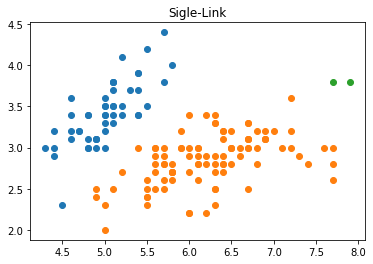

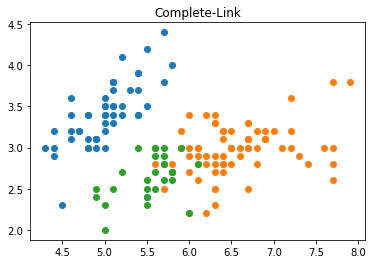

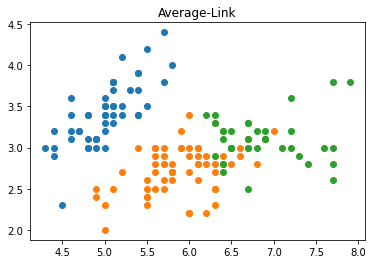

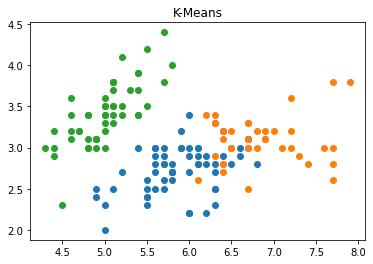

In [8]:
hierarchicalMethods = {0: [sLink, 'Sigle-Link'],
                       1: [cLink, 'Complete-Link'],
                       2: [aLink, 'Average-Link']}

for h in range(0,len(hierarchicalMethods)):
  newData = np.zeros((len(data), np.size(data,1)+1))
  newData[:,:-1] = data
  cl = hierarchicalMethods[h][0]
  newData[:,-1] = cl
  uniqueClusters = np.unique(cl)
  separatedByClus = {}
  for o in uniqueClusters:
    separatedByClus[o] = newData[newData[:,-1] == o, :-1]
    temp = np.asarray(separatedByClus[o])
    plt.scatter(temp[:,0],temp[:,1])
    plt.title(hierarchicalMethods[h][1])
  plt.show()

cl = kMeans(data, k=K)
separatedByClus = {}
for i in range(1,K+1):
  separatedByClus[i] = cl[cl[:,-1] == i, :-1]
  temp = np.asarray(separatedByClus[i])
  plt.scatter(temp[:,0],temp[:,1])
  plt.title('K-Means')
plt.show()